In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_excel("../../dataset/First Experiment/Lufthansa/Lufthansa(SKG_BRU).xlsx")
df = pd.DataFrame(data)

In [4]:
df.head()

,departure_time,arrival_time,days_before,day_of_week,num_of_luggage,num_of_stops,overnight_flight,Class,price
0,15:35:00,20:00:00,0,2,1,2,1,111,343.71
1,15:35:00,22:25:00,0,2,1,1,0,110,391.47
2,15:35:00,10:25:00,0,2,1,1,1,110,432.17
3,15:35:00,22:05:00,0,2,1,2,0,222,448.53
4,17:30:00,16:20:00,0,2,1,1,1,110,454.56


In [5]:
for i in df.columns:
  print(i,"\t\t-\t", df[i].isna().mean()*100)

departure_time 		-	 0.0
arrival_time 		-	 0.0
days_before 		-	 0.0
day_of_week 		-	 0.0
num_of_luggage 		-	 0.0
num_of_stops 		-	 0.0
overnight_flight 		-	 0.0
Class 		-	 0.0
price 		-	 0.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4786 entries, 0 to 4785
Data columns (total 9 columns):
departure_time      4786 non-null object
arrival_time        4786 non-null object
days_before         4786 non-null int64
day_of_week         4786 non-null int64
num_of_luggage      4786 non-null int64
num_of_stops        4786 non-null int64
overnight_flight    4786 non-null int64
Class               4786 non-null int64
price               4786 non-null float64
dtypes: float64(1), int64(6), object(2)
memory usage: 336.6+ KB


In [7]:
df.shape

(4786, 9)

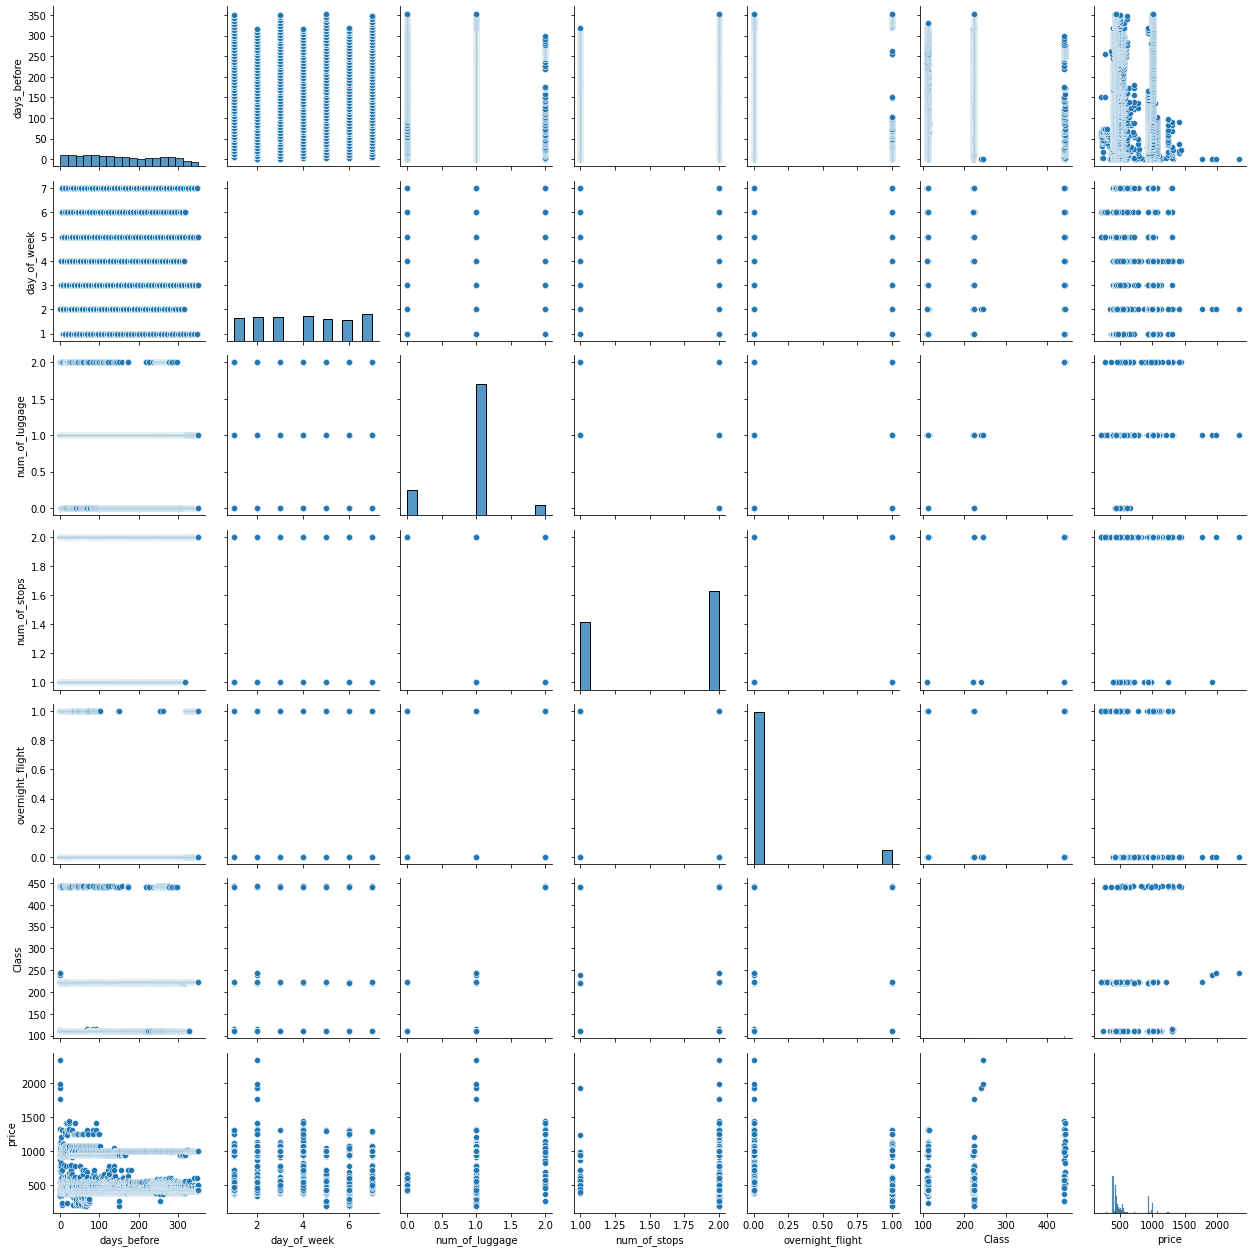

In [8]:
sns.pairplot(df)
plt.tight_layout()

In [9]:
df['departure_time'] = pd.to_datetime(df['departure_time'], format='%H:%M:%S')

In [10]:
df['arrival_time'] = pd.to_datetime(df['arrival_time'], format='%H:%M:%S')

In [11]:
df.head()

,departure_time,arrival_time,days_before,day_of_week,num_of_luggage,num_of_stops,overnight_flight,Class,price
0,1900-01-01 15:35:00,1900-01-01 20:00:00,0,2,1,2,1,111,343.71
1,1900-01-01 15:35:00,1900-01-01 22:25:00,0,2,1,1,0,110,391.47
2,1900-01-01 15:35:00,1900-01-01 10:25:00,0,2,1,1,1,110,432.17
3,1900-01-01 15:35:00,1900-01-01 22:05:00,0,2,1,2,0,222,448.53
4,1900-01-01 17:30:00,1900-01-01 16:20:00,0,2,1,1,1,110,454.56


In [12]:
df['departuretime'] = pd.to_datetime(df['departure_time']).astype(np.int64)

In [13]:
df['arrivaltime'] = pd.to_datetime(df['arrival_time']).astype(np.int64)

In [14]:
df.head()

,departure_time,arrival_time,days_before,day_of_week,num_of_luggage,num_of_stops,overnight_flight,Class,price,departuretime,arrivaltime
0,1900-01-01 15:35:00,1900-01-01 20:00:00,0,2,1,2,1,111,343.71,-2208932700000000000,-2208916800000000000
1,1900-01-01 15:35:00,1900-01-01 22:25:00,0,2,1,1,0,110,391.47,-2208932700000000000,-2208908100000000000
2,1900-01-01 15:35:00,1900-01-01 10:25:00,0,2,1,1,1,110,432.17,-2208932700000000000,-2208951300000000000
3,1900-01-01 15:35:00,1900-01-01 22:05:00,0,2,1,2,0,222,448.53,-2208932700000000000,-2208909300000000000
4,1900-01-01 17:30:00,1900-01-01 16:20:00,0,2,1,1,1,110,454.56,-2208925800000000000,-2208930000000000000


In [15]:
df.columns

Index(['departure_time', 'arrival_time', 'days_before', 'day_of_week',
       'num_of_luggage', 'num_of_stops', 'overnight_flight', 'Class', 'price',
       'departuretime', 'arrivaltime'],
      dtype='object')

In [16]:
df = df[['departuretime','arrivaltime','day_of_week', 'days_before','num_of_luggage', 'num_of_stops', 'overnight_flight','Class','price']]

In [17]:
del df['departuretime']

In [18]:
del df['arrivaltime']

In [19]:
#df = df.apply(np.int64)

In [20]:
df.head()

,day_of_week,days_before,num_of_luggage,num_of_stops,overnight_flight,Class,price
0,2,0,1,2,1,111,343.71
1,2,0,1,1,0,110,391.47
2,2,0,1,1,1,110,432.17
3,2,0,1,2,0,222,448.53
4,2,0,1,1,1,110,454.56


In [21]:
df.to_csv('skg_bru_proc.csv')

In [22]:
X = df.drop(['price'], axis=1)
y = df['price']

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=False)

In [3]:
ML_Model = []
accuracy = []

#function to call for storing the results
def storeResults(model, a):
    ML_Model.append(model)
    accuracy.append(round(a, 3))

# AdaBoost

In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

In [25]:
crossvalidation=KFold(n_splits=10,shuffle=True,random_state=1)

In [26]:
from sklearn.ensemble import AdaBoostRegressor
search_grid={'n_estimators':[5000,10000,20000],'learning_rate':[.001,0.01,.1],'random_state':[1]}
adr = AdaBoostRegressor()
search=GridSearchCV(estimator=adr,param_grid=search_grid,scoring='neg_mean_squared_error',n_jobs=1,cv=crossvalidation)
search.fit(X_train,y_train)


GridSearchCV(cv=KFold(n_splits=10, random_state=1, shuffle=True),
             estimator=AdaBoostRegressor(), n_jobs=1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1],
                         'n_estimators': [5000, 10000, 20000],
                         'random_state': [1]},
             scoring='neg_mean_squared_error')

In [27]:
y_pred = search.predict(X_test)

from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred)))

Accuracy score of the predictions: 0.21382794045580078


In [4]:
ab_sc = r2_score(y_test, y_pred)
storeResults('AdaBoost',ab_sc)

# Bagging Regressor

In [28]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

clf = BaggingRegressor(DecisionTreeRegressor(),n_estimators=10000, random_state=0)

clf.fit(X_train,y_train)

BaggingRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=10000,
                 random_state=0)

In [29]:
y_pred = clf.predict(X_test)

from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred)))

Accuracy score of the predictions: 0.5489953510195335


In [5]:
bag_sc = r2_score(y_test, y_pred)
storeResults('Bagging',bag_sc)

# Gradient Boosting

In [30]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(n_estimators=10000, random_state=0)

gbr.fit(X_train,y_train)

y_pred = gbr.predict(X_test)

from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred)))

Accuracy score of the predictions: 0.5475101249111409


In [6]:
gb_sc = r2_score(y_test, y_pred)
storeResults('Gradient Boosting',gb_sc)

# Decision Tree

In [31]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(random_state=0)

dtr.fit(X_train,y_train)

y_pred = dtr.predict(X_test)

from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred)))

Accuracy score of the predictions: 0.5552073587733231


In [7]:
dt_sc = r2_score(y_test, y_pred)
storeResults('Decision Tree',dt_sc)

# RAndom Forest

In [32]:
from sklearn.ensemble import RandomForestRegressor

param_grid = {
    'n_estimators': [25, 50, 100, 150],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 6, 9],
    'max_leaf_nodes': [3, 6, 9],
}

rfr = RandomForestRegressor(max_depth=2, random_state=0)

grid_forest = GridSearchCV(rfr,param_grid=param_grid)

grid_forest.fit(X_train,y_train)

y_pred = grid_forest.predict(X_test)

from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred)))

Accuracy score of the predictions: 0.31091851903875534


In [8]:
rf_sc = r2_score(y_test, y_pred)
storeResults('Random Forest',rf_sc)

# Extra Tree

In [33]:
from sklearn.ensemble import ExtraTreesRegressor

etr = ExtraTreesRegressor(n_estimators=10000, random_state=0)

etr.fit(X_train,y_train)

y_pred = etr.predict(X_test)

from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred)))

Accuracy score of the predictions: 0.5552063976071567


In [9]:
et_sc = r2_score(y_test, y_pred)
storeResults('Extra Tree',et_sc)

# SVR

In [34]:
from sklearn.svm import SVR

sr = SVR(C=1.0, epsilon=0.2)

sr.fit(X_train,y_train)

y_pred = sr.predict(X_test)

from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred)))

Accuracy score of the predictions: -0.16130345548646896


In [10]:
svr_sc = r2_score(y_test, y_pred)
storeResults('SVR',svr_sc)

# MLP

In [35]:
from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(random_state=1, max_iter=500)
mlp.fit(X_train,y_train)

y_pred = mlp.predict(X_test)

from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred)))

Accuracy score of the predictions: 0.19299642628512337


In [11]:
mlp_sc = r2_score(y_test, y_pred)
storeResults('MLP',mlp_sc)

# DL

In [36]:
X_train = np.array(X).reshape(X.shape[0], X.shape[1], 1)
X_test = np.array(X).reshape(X.shape[0], X.shape[1], 1)

In [37]:
import tensorflow as tf
gpus = tf.config.list_physical_devices('GPU')
if gpus:
  # Create 2 virtual GPUs with 1GB memory each
  try:
    tf.config.set_logical_device_configuration(
        gpus[0],
        [tf.config.LogicalDeviceConfiguration(memory_limit=1024),
         tf.config.LogicalDeviceConfiguration(memory_limit=1024)])
    logical_gpus = tf.config.list_logical_devices('GPU')
    print(len(gpus), "Physical GPU,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Virtual devices must be set before GPUs have been initialized
    print(e)

1 Physical GPU, 2 Logical GPUs


In [38]:
from tensorflow.keras import Sequential,utils
from tensorflow.keras.layers import Flatten, Dense, Conv1D, MaxPool1D, Dropout

# VGG11

In [39]:
def vgg11():
    
    model = Sequential()
    
    model.add(Conv1D(32, kernel_size=(3,), padding='same', activation='relu', input_shape = (X_train.shape[1],1)))
    model.add(Conv1D(64, kernel_size=(3,), padding='same', activation='relu'))
    model.add(Conv1D(128, kernel_size=(5,), padding='same', activation='relu'))
    
    model.add(Flatten())   
    model.add(Dense(50, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(units = 1))
    
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    return model

In [40]:
model = vgg11()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 6, 32)             128       
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 6, 64)             6208      
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 6, 128)            41088     
_________________________________________________________________
flatten (Flatten)            (None, 768)               0         
_________________________________________________________________
dense (Dense)                (None, 50)                38450     
_________________________________________________________________
dense_1 (Dense)              (None, 20)                1020      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 2

In [41]:
model.fit(X_train, y, epochs=200, validation_split=0.2)

Epoch 1/200
120/120 [==============================] - 4s 5ms/step - loss: 115010.2969 - val_loss: 55036.0938
Epoch 2/200
120/120 [==============================] - 0s 3ms/step - loss: 82699.6094 - val_loss: 57639.5703
Epoch 3/200
120/120 [==============================] - 0s 3ms/step - loss: 81184.8750 - val_loss: 78923.9531
Epoch 4/200
120/120 [==============================] - 0s 3ms/step - loss: 80267.2656 - val_loss: 51387.1133
Epoch 5/200
120/120 [==============================] - 0s 3ms/step - loss: 77434.8750 - val_loss: 52610.5820
Epoch 6/200
120/120 [==============================] - 0s 4ms/step - loss: 70238.6562 - val_loss: 40142.1133
Epoch 7/200
120/120 [==============================] - 0s 4ms/step - loss: 62413.1445 - val_loss: 38108.9141
Epoch 8/200
120/120 [==============================] - 0s 4ms/step - loss: 58506.9492 - val_loss: 41814.0469
Epoch 9/200
120/120 [==============================] - 0s 4ms/step - loss: 55626.1445 - val_loss: 45613.6094
Epoch 10/200
120/1

120/120 [==============================] - ETA: 0s - loss: 38856.367 - 0s 4ms/step - loss: 38720.5938 - val_loss: 30125.5586
Epoch 76/200
120/120 [==============================] - 0s 4ms/step - loss: 38841.9453 - val_loss: 30899.8574
Epoch 77/200
120/120 [==============================] - 0s 4ms/step - loss: 38846.6914 - val_loss: 31282.8457
Epoch 78/200
120/120 [==============================] - 0s 4ms/step - loss: 38701.1719 - val_loss: 31968.8574
Epoch 79/200
120/120 [==============================] - 1s 4ms/step - loss: 38515.7656 - val_loss: 30750.8223
Epoch 80/200
120/120 [==============================] - 0s 4ms/step - loss: 38699.4609 - val_loss: 31384.4473
Epoch 81/200
120/120 [==============================] - 0s 4ms/step - loss: 39385.7969 - val_loss: 31230.7383
Epoch 82/200
120/120 [==============================] - 0s 4ms/step - loss: 38260.1406 - val_loss: 34690.5469
Epoch 83/200
120/120 [==============================] - 0s 4ms/step - loss: 38481.8438 - val_loss: 32620.

In [42]:
y_pred = model.predict(X_test)
print("Accuracy score of the predictions: {0}".format(r2_score(y, y_pred)))

Accuracy score of the predictions: 0.3771283006911317


In [12]:
vgg_sc = r2_score(y, y_pred)
storeResults('VGG11',vgg_sc)

# VGG13

In [43]:
def vgg13():
    
    model = Sequential()
    
    model.add(Conv1D(16, kernel_size=(3,), padding='same', activation='relu', input_shape = (X_train.shape[1],1)))
    model.add(Conv1D(32, kernel_size=(3,), padding='same', activation='relu'))
    model.add(Conv1D(64, kernel_size=(5,), padding='same', activation='relu'))
    
    model.add(Flatten())   
    model.add(Dense(50, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(units = 1))
    
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    return model

In [44]:
model = vgg13()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_3 (Conv1D)            (None, 6, 16)             64        
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 6, 32)             1568      
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 6, 64)             10304     
_________________________________________________________________
flatten_1 (Flatten)          (None, 384)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 50)                19250     
_________________________________________________________________
dense_4 (Dense)              (None, 20)                1020      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                

In [45]:
model.fit(X_train, y, epochs=200, validation_split=0.2)

Epoch 1/200
120/120 [==============================] - 1s 5ms/step - loss: 119730.3984 - val_loss: 57712.2891
Epoch 2/200
120/120 [==============================] - 0s 4ms/step - loss: 81554.0547 - val_loss: 47929.7656
Epoch 3/200
120/120 [==============================] - 0s 4ms/step - loss: 80590.4297 - val_loss: 59363.5508
Epoch 4/200
120/120 [==============================] - 0s 4ms/step - loss: 78900.6562 - val_loss: 54078.1016
Epoch 5/200
120/120 [==============================] - 0s 4ms/step - loss: 75617.2031 - val_loss: 43523.4531
Epoch 6/200
120/120 [==============================] - 0s 4ms/step - loss: 67374.2500 - val_loss: 37526.6602
Epoch 7/200
120/120 [==============================] - 0s 4ms/step - loss: 61766.2344 - val_loss: 39530.7344
Epoch 8/200
120/120 [==============================] - 0s 4ms/step - loss: 57522.6172 - val_loss: 37935.5000
Epoch 9/200
120/120 [==============================] - 0s 4ms/step - loss: 55799.5000 - val_loss: 37668.8438
Epoch 10/200
120/1

120/120 [==============================] - 0s 4ms/step - loss: 37110.5039 - val_loss: 30070.2402
Epoch 150/200
120/120 [==============================] - 0s 4ms/step - loss: 37563.5742 - val_loss: 30851.7051
Epoch 151/200
120/120 [==============================] - 0s 4ms/step - loss: 37204.8750 - val_loss: 28949.6113
Epoch 152/200
120/120 [==============================] - 0s 4ms/step - loss: 37688.8867 - val_loss: 30128.0117
Epoch 153/200
120/120 [==============================] - 0s 4ms/step - loss: 37529.9180 - val_loss: 28825.8516
Epoch 154/200
120/120 [==============================] - 0s 4ms/step - loss: 36993.5430 - val_loss: 32128.6602
Epoch 155/200
120/120 [==============================] - 0s 4ms/step - loss: 37926.7695 - val_loss: 29545.2148
Epoch 156/200
120/120 [==============================] - 0s 4ms/step - loss: 37062.4570 - val_loss: 28748.2852
Epoch 157/200
120/120 [==============================] - 0s 4ms/step - loss: 37239.2969 - val_loss: 33915.2227
Epoch 158/200
1

In [46]:
y_pred = model.predict(X_test)
print("Accuracy score of the predictions: {0}".format(r2_score(y, y_pred)))

Accuracy score of the predictions: 0.3798072698540925


In [13]:
vgg1_sc = r2_score(y, y_pred)
storeResults('VGG13',vgg1_sc)

# ResNet18

In [47]:
def resnet18():
    
    model = Sequential()
    
    model.add(Conv1D(16, kernel_size=(3,), padding='same', activation='relu', input_shape = (X_train.shape[1],1)))
    model.add(Conv1D(32, kernel_size=(3,), padding='same', activation='relu'))
    model.add(Conv1D(64, kernel_size=(5,), padding='same', activation='relu'))
    
    model.add(Flatten())   
    model.add(Dense(50, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(units = 1))
    
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    return model

model = resnet18()
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_6 (Conv1D)            (None, 6, 16)             64        
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 6, 32)             1568      
_________________________________________________________________
conv1d_8 (Conv1D)            (None, 6, 64)             10304     
_________________________________________________________________
flatten_2 (Flatten)          (None, 384)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 50)                19250     
_________________________________________________________________
dense_7 (Dense)              (None, 20)                1020      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                

In [48]:
model.fit(X_train, y, epochs=200, validation_split=0.2)

y_pred = model.predict(X_test)
print("Accuracy score of the predictions: {0}".format(r2_score(y, y_pred)))

Epoch 1/200
120/120 [==============================] - 1s 5ms/step - loss: 129543.6172 - val_loss: 60721.4961
Epoch 2/200
120/120 [==============================] - 0s 4ms/step - loss: 83955.8438 - val_loss: 61930.1367
Epoch 3/200
120/120 [==============================] - 0s 4ms/step - loss: 81487.9688 - val_loss: 59760.9492
Epoch 4/200
120/120 [==============================] - 0s 4ms/step - loss: 80325.7969 - val_loss: 80761.5469
Epoch 5/200
120/120 [==============================] - 0s 4ms/step - loss: 78787.0703 - val_loss: 76615.9922
Epoch 6/200
120/120 [==============================] - 0s 4ms/step - loss: 76428.7031 - val_loss: 70355.4453
Epoch 7/200
120/120 [==============================] - 0s 4ms/step - loss: 72556.3984 - val_loss: 65893.1328
Epoch 8/200
120/120 [==============================] - 0s 4ms/step - loss: 65901.9453 - val_loss: 40114.3516
Epoch 9/200
120/120 [==============================] - 0s 4ms/step - loss: 59237.7266 - val_loss: 38861.4883
Epoch 10/200
120/1

120/120 [==============================] - 0s 4ms/step - loss: 39317.4453 - val_loss: 36562.4805
Epoch 150/200
120/120 [==============================] - 0s 4ms/step - loss: 39744.7227 - val_loss: 31166.1484
Epoch 151/200
120/120 [==============================] - 0s 4ms/step - loss: 39348.3320 - val_loss: 38916.5430
Epoch 152/200
120/120 [==============================] - 0s 4ms/step - loss: 39091.7617 - val_loss: 31216.2891
Epoch 153/200
120/120 [==============================] - 0s 4ms/step - loss: 39459.2891 - val_loss: 31283.8555
Epoch 154/200
120/120 [==============================] - 0s 4ms/step - loss: 38858.1562 - val_loss: 31354.9082
Epoch 155/200
120/120 [==============================] - 0s 4ms/step - loss: 39301.7188 - val_loss: 31175.5566
Epoch 156/200
120/120 [==============================] - 0s 4ms/step - loss: 39155.6836 - val_loss: 30743.0723
Epoch 157/200
120/120 [==============================] - 0s 4ms/step - loss: 38843.3047 - val_loss: 37004.1172
Epoch 158/200
1

In [14]:
res18_sc = r2_score(y, y_pred)
storeResults('ResNet18',res18_sc)

# ResNet34

In [49]:
def resnet34():
    
    model = Sequential()
    
    model.add(Conv1D(64, kernel_size=(3,), padding='same', activation='relu', input_shape = (X_train.shape[1],1)))
    model.add(Conv1D(128, kernel_size=(3,), padding='same', activation='relu'))
    model.add(Conv1D(516, kernel_size=(5,), padding='same', activation='relu'))
    
    model.add(Flatten())   
    model.add(Dense(50, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(units = 1))
    
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    return model

model = resnet34()
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_9 (Conv1D)            (None, 6, 64)             256       
_________________________________________________________________
conv1d_10 (Conv1D)           (None, 6, 128)            24704     
_________________________________________________________________
conv1d_11 (Conv1D)           (None, 6, 516)            330756    
_________________________________________________________________
flatten_3 (Flatten)          (None, 3096)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 50)                154850    
_________________________________________________________________
dense_10 (Dense)             (None, 20)                1020      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                

In [50]:
model.fit(X_train, y, epochs=200, validation_split=0.2)

y_pred = model.predict(X_test)
print("Accuracy score of the predictions: {0}".format(r2_score(y, y_pred)))

Epoch 1/200
120/120 [==============================] - 1s 6ms/step - loss: 107590.6797 - val_loss: 83679.5000
Epoch 2/200
120/120 [==============================] - 0s 4ms/step - loss: 83230.1250 - val_loss: 60664.0469
Epoch 3/200
120/120 [==============================] - 0s 4ms/step - loss: 80094.8281 - val_loss: 71281.9531
Epoch 4/200
120/120 [==============================] - 0s 4ms/step - loss: 77196.6016 - val_loss: 85262.5156
Epoch 5/200
120/120 [==============================] - 0s 4ms/step - loss: 68857.6328 - val_loss: 38524.5703
Epoch 6/200
120/120 [==============================] - 0s 4ms/step - loss: 58632.3320 - val_loss: 65201.6719
Epoch 7/200
120/120 [==============================] - 0s 4ms/step - loss: 55044.0664 - val_loss: 47963.9141
Epoch 8/200
120/120 [==============================] - 0s 4ms/step - loss: 56928.5430 - val_loss: 35455.6328
Epoch 9/200
120/120 [==============================] - 0s 4ms/step - loss: 57178.1758 - val_loss: 37054.7500
Epoch 10/200
120/1

120/120 [==============================] - 0s 4ms/step - loss: 36108.8242 - val_loss: 32443.2520
Epoch 149/200
120/120 [==============================] - 1s 4ms/step - loss: 36229.0586 - val_loss: 31570.0703
Epoch 150/200
120/120 [==============================] - 0s 4ms/step - loss: 35325.1719 - val_loss: 29976.9199
Epoch 151/200
120/120 [==============================] - 0s 4ms/step - loss: 35337.5859 - val_loss: 31273.3887
Epoch 152/200
120/120 [==============================] - 0s 4ms/step - loss: 35519.5625 - val_loss: 33515.1328
Epoch 153/200
120/120 [==============================] - 0s 4ms/step - loss: 35182.3242 - val_loss: 34184.5508
Epoch 154/200
120/120 [==============================] - 0s 4ms/step - loss: 35412.7812 - val_loss: 33891.3828
Epoch 155/200
120/120 [==============================] - 0s 4ms/step - loss: 35563.2266 - val_loss: 34500.8945
Epoch 156/200
120/120 [==============================] - 0s 4ms/step - loss: 35767.0430 - val_loss: 31128.1719
Epoch 157/200
1

In [15]:
res34_sc = r2_score(y, y_pred)
storeResults('ResNet34',res34_sc)

# MobileNetv1

In [51]:
def mobilenetv1():
    
    model = Sequential()
    
    model.add(Conv1D(8, kernel_size=(3,), padding='same', activation='relu', input_shape = (X_train.shape[1],1)))
    model.add(Conv1D(16, kernel_size=(3,), padding='same', activation='relu'))
    model.add(Conv1D(32, kernel_size=(5,), padding='same', activation='relu'))
    
    model.add(Flatten())   
    model.add(Dense(50, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(units = 1))
    
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    return model

model = mobilenetv1()
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_12 (Conv1D)           (None, 6, 8)              32        
_________________________________________________________________
conv1d_13 (Conv1D)           (None, 6, 16)             400       
_________________________________________________________________
conv1d_14 (Conv1D)           (None, 6, 32)             2592      
_________________________________________________________________
flatten_4 (Flatten)          (None, 192)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 50)                9650      
_________________________________________________________________
dense_13 (Dense)             (None, 20)                1020      
_________________________________________________________________
dense_14 (Dense)             (None, 1)                

In [52]:
model.fit(X_train, y, epochs=200, validation_split=0.2)

y_pred = model.predict(X_test)
print("Accuracy score of the predictions: {0}".format(r2_score(y, y_pred)))

Epoch 1/200
120/120 [==============================] - 1s 5ms/step - loss: 150868.6719 - val_loss: 67525.9609
Epoch 2/200
120/120 [==============================] - 1s 4ms/step - loss: 81164.6797 - val_loss: 51959.7031
Epoch 3/200
120/120 [==============================] - 0s 4ms/step - loss: 80590.7344 - val_loss: 56419.1992
Epoch 4/200
120/120 [==============================] - 0s 4ms/step - loss: 78908.6172 - val_loss: 51383.1328
Epoch 5/200
120/120 [==============================] - 0s 4ms/step - loss: 76331.4531 - val_loss: 53432.4961
Epoch 6/200
120/120 [==============================] - 0s 4ms/step - loss: 72970.5469 - val_loss: 40215.3984
Epoch 7/200
120/120 [==============================] - 0s 4ms/step - loss: 68061.7422 - val_loss: 45781.8438
Epoch 8/200
120/120 [==============================] - 0s 4ms/step - loss: 62520.8125 - val_loss: 37075.2500
Epoch 9/200
120/120 [==============================] - 0s 4ms/step - loss: 58432.4766 - val_loss: 37943.8320
Epoch 10/200
120/1

120/120 [==============================] - 0s 4ms/step - loss: 38526.3320 - val_loss: 29682.4805
Epoch 150/200
120/120 [==============================] - 0s 4ms/step - loss: 38340.2266 - val_loss: 31326.2051
Epoch 151/200
120/120 [==============================] - 0s 4ms/step - loss: 38418.1992 - val_loss: 30652.6719
Epoch 152/200
120/120 [==============================] - 0s 4ms/step - loss: 38530.1445 - val_loss: 30330.1328
Epoch 153/200
120/120 [==============================] - 0s 4ms/step - loss: 37974.8320 - val_loss: 30608.8516
Epoch 154/200
120/120 [==============================] - 0s 4ms/step - loss: 38406.6367 - val_loss: 30856.8789
Epoch 155/200
120/120 [==============================] - 0s 4ms/step - loss: 38148.9922 - val_loss: 34976.6602
Epoch 156/200
120/120 [==============================] - 0s 4ms/step - loss: 38452.9180 - val_loss: 35572.4922
Epoch 157/200
120/120 [==============================] - 0s 4ms/step - loss: 38363.4844 - val_loss: 30651.9707
Epoch 158/200
1

In [16]:
mob1_sc = r2_score(y, y_pred)
storeResults('MobileNetV1',mob1_sc)

# MobileNetV2

In [53]:
def mobilenetv2():
    
    model = Sequential()
    
    model.add(Conv1D(128, kernel_size=(3,), padding='same', activation='relu', input_shape = (X_train.shape[1],1)))
    model.add(Conv1D(516, kernel_size=(3,), padding='same', activation='relu'))
    model.add(Conv1D(1024, kernel_size=(5,), padding='same', activation='relu'))
    
    model.add(Flatten())   
    model.add(Dense(50, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(units = 1))
    
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    return model

model = mobilenetv2()
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_15 (Conv1D)           (None, 6, 128)            512       
_________________________________________________________________
conv1d_16 (Conv1D)           (None, 6, 516)            198660    
_________________________________________________________________
conv1d_17 (Conv1D)           (None, 6, 1024)           2642944   
_________________________________________________________________
flatten_5 (Flatten)          (None, 6144)              0         
_________________________________________________________________
dense_15 (Dense)             (None, 50)                307250    
_________________________________________________________________
dense_16 (Dense)             (None, 20)                1020      
_________________________________________________________________
dense_17 (Dense)             (None, 1)                

In [54]:
model.fit(X_train, y, epochs=200, validation_split=0.2)

y_pred = model.predict(X_test)
print("Accuracy score of the predictions: {0}".format(r2_score(y, y_pred)))

Epoch 1/200
120/120 [==============================] - 1s 7ms/step - loss: 95138.9531 - val_loss: 91268.5859
Epoch 2/200
120/120 [==============================] - 1s 5ms/step - loss: 88030.8281 - val_loss: 46706.1758
Epoch 3/200
120/120 [==============================] - 1s 5ms/step - loss: 81471.3359 - val_loss: 41980.1094
Epoch 4/200
120/120 [==============================] - 1s 5ms/step - loss: 68058.6562 - val_loss: 42354.9531
Epoch 5/200
120/120 [==============================] - 1s 4ms/step - loss: 58959.4141 - val_loss: 44699.0977
Epoch 6/200
120/120 [==============================] - 1s 4ms/step - loss: 56330.1055 - val_loss: 37138.6289
Epoch 7/200
120/120 [==============================] - 1s 4ms/step - loss: 55224.7148 - val_loss: 50092.7070
Epoch 8/200
120/120 [==============================] - 1s 4ms/step - loss: 55087.4961 - val_loss: 38990.9609
Epoch 9/200
120/120 [==============================] - 1s 4ms/step - loss: 54825.5898 - val_loss: 44630.0938
Epoch 10/200
120/12

120/120 [==============================] - 1s 4ms/step - loss: 36109.9453 - val_loss: 30792.8516
Epoch 150/200
120/120 [==============================] - 1s 5ms/step - loss: 35571.5078 - val_loss: 31348.0742
Epoch 151/200
120/120 [==============================] - 1s 5ms/step - loss: 35978.9062 - val_loss: 33666.2422
Epoch 152/200
120/120 [==============================] - 1s 5ms/step - loss: 35752.1016 - val_loss: 31217.3125
Epoch 153/200
120/120 [==============================] - 1s 5ms/step - loss: 35532.4219 - val_loss: 33758.5117
Epoch 154/200
120/120 [==============================] - 1s 4ms/step - loss: 35445.0039 - val_loss: 33408.2188
Epoch 155/200
120/120 [==============================] - 1s 4ms/step - loss: 35860.0742 - val_loss: 32649.7695
Epoch 156/200
120/120 [==============================] - 1s 4ms/step - loss: 35819.0000 - val_loss: 32632.4277
Epoch 157/200
120/120 [==============================] - 1s 4ms/step - loss: 35513.4219 - val_loss: 33965.2695
Epoch 158/200
1

In [17]:
mob2_sc = r2_score(y, y_pred)
storeResults('MobileNetV2',mob2_sc)

# Comparison

In [18]:
#creating dataframe
import pandas as pd
result = pd.DataFrame({ 'ML Model' : ML_Model,
                        'R2-Score' : accuracy,
                      })

In [19]:
result

,ML Model,R2-Score
0,AdaBoost,0.213
1,Bagging,0.549
2,Gradient Boosting,0.547
3,Decision Tree,0.555
4,Random Forest,0.311
5,Extra Tree,0.555
6,SVR,0.161
7,MLP,0.193
8,VGG11,0.377
9,VGG13,0.380


# Graph

In [20]:
import numpy as np
classifier = ML_Model
y_pos = np.arange(len(classifier))

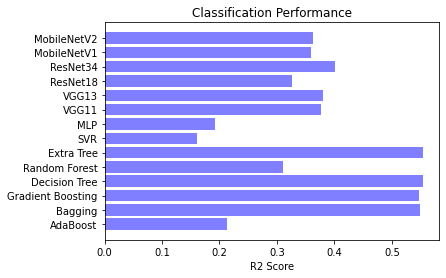

In [21]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, accuracy, align='center', alpha=0.5,color='blue')
plt2.yticks(y_pos, classifier)
plt2.xlabel('R2 Score')
plt2.title('Classification Performance')
plt2.show()